In [1]:
# Import the package and data
import pandas as pd
import numpy as np 

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn 
from matplotlib import pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Accuracy
from sklearn.metrics import accuracy_score
## Precision
from sklearn.metrics import precision_score
## Recall
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn import tree

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('../0-data/Root_Insurance_data.csv')



In [3]:
# Data clean
## Currently Insured: categorical/unknow, N, Y
## Number of Vehicles: ordinal
## Number of Drivers: ordinal
## Marital Status: categorical/ M, S
## rank: ordinal

## There are two ways to run regressions when having categorial variables in datasets.
## 1. Delete those categorical variables.
## 2. Keep them but generate dummy variables. 
## since we don't have much features in our dataset, i would go for dummies.

## Create dummies for Currently Insured and Marital Status. 
## 1. For Currently Insured, i left "unknow" as baseline case. So Insured_N, and Insured_Y are created and included. 
## 2. For Marital Status, i left "S" as baseline case. So Married are created and included. 
## For the other variables I would treat them as ordinal.

pd.get_dummies(df['Currently Insured'])
df['Insured_Un'] = pd.get_dummies(df['Currently Insured'])['unknown']
df['Insured_N'] = pd.get_dummies(df['Currently Insured'])['N']
df['Insured_Y'] = pd.get_dummies(df['Currently Insured'])['Y']

pd.get_dummies(df['Marital Status'])
df['Married'] = pd.get_dummies(df['Marital Status'])['M']

df['no.veh1'] = pd.get_dummies(df['Number of Vehicles'])[1]
df['no.veh2'] = pd.get_dummies(df['Number of Vehicles'])[2]
df['no.veh3'] = pd.get_dummies(df['Number of Vehicles'])[3]

df['no.dri1'] = pd.get_dummies(df['Number of Drivers'])[1]
df['no.dri2'] = pd.get_dummies(df['Number of Drivers'])[2]


pd.get_dummies(df['click'])
df['click_true'] = pd.get_dummies(df['click'])[True]



df.head()

,Currently Insured,Number of Vehicles,Number of Drivers,Marital Status,bid,rank,click,policies_sold,Insured_Un,Insured_N,Insured_Y,Married,no.veh1,no.veh2,no.veh3,no.dri1,no.dri2,click_true
0,unknown,2,1,M,10.0,2,False,0,1,0,0,1,0,1,0,1,0,0
1,Y,3,1,M,10.0,5,False,0,0,0,1,1,0,0,1,1,0,0
2,Y,3,2,M,10.0,5,False,0,0,0,1,1,0,0,1,0,1,0
3,N,3,2,S,10.0,4,False,0,0,1,0,0,0,0,1,0,1,0
4,unknown,2,2,S,10.0,2,False,0,1,0,0,0,0,1,0,0,1,0


df.columns

X = df[['Insured_Un','Insured_N','Insured_Y', 'Married', 'no.veh1', 'no.veh2', 'no.veh3','no.dri1', 'no.dri2']].copy()
X = sm.add_constant(X)
y = df['policies_sold'].copy()

In [6]:
X = df[['Insured_Un','Insured_N','Insured_Y', 'Married', 'no.veh1', 'no.veh2', 'no.veh3','no.dri1', 'no.dri2','rank']].copy()
X = sm.add_constant(X)
y = df['policies_sold'].copy()

df1 = df[(df['rank'] == 1)]


X = df1[['Insured_Un','Insured_N','Insured_Y', 'Married', 'no.veh1', 'no.veh2', 'no.veh3','no.dri1', 'no.dri2']].copy()
X = sm.add_constant(X)
y = df1['click'].copy()

df2 = df[(df['rank'] != 1)]

X = df2[[X = df1[['Insured_Un','Insured_N','Insured_Y', 'Married', 'no.veh1', 'no.veh2', 'no.veh3','no.dri1', 'no.dri2']].copy()
X = sm.add_constant(X)
y = df2['click'].copy()

df2

df3 = df[(df['rank'] == 3)]

X = df3[[X = df1[['Insured_Un','Insured_N','Insured_Y', 'Married', 'no.veh1', 'no.veh2', 'no.veh3','no.dri1', 'no.dri2']].copy()

X = sm.add_constant(X)
y = df3['click'].copy()


df4 = df[(df['rank'] == 4)]

X = df4[[X = df1[['Insured_Un','Insured_N','Insured_Y', 'Married', 'no.veh1', 'no.veh2', 'no.veh3','no.dri1', 'no.dri2']].copy()

X = sm.add_constant(X)
y = df4['click'].copy()

df5 = df[(df['rank'] == 5)]

X = df5[[X = df1[['Insured_Un','Insured_N','Insured_Y', 'Married', 'no.veh1', 'no.veh2', 'no.veh3','no.dri1', 'no.dri2']].copy()

X = sm.add_constant(X)
y = df5['click'].copy()

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=.2,
                                                shuffle=True,
                                                random_state=800,
                                                stratify=y)

In [8]:
random_state = 111
max_depth = 5
min_samples_split = 20


clf = tree.DecisionTreeClassifier(max_depth =max_depth,random_state=random_state,min_samples_split = min_samples_split)

In [9]:
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

roc_auc

0.5

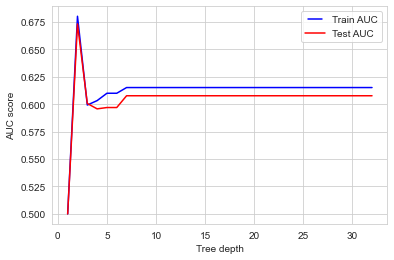

In [8]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   clf = tree.DecisionTreeClassifier(max_depth=max_depth)
   clf.fit(X_train, y_train)
   train_pred = clf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = clf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

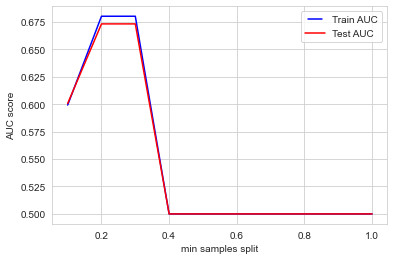

In [9]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   clf = tree.DecisionTreeClassifier(min_samples_split=min_samples_split)
   clf.fit(X_train, y_train)
   train_pred = clf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = clf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results,'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results,'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()



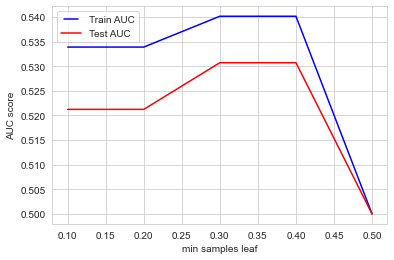

In [25]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   clf = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   clf.fit(X_train, y_train)
   train_pred = clf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = clf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results,'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results,'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()



In [14]:
random_state = 120
max_depth = 5
min_samples_split = 0.2
min_samples_leaf=0.4


clf = tree.DecisionTreeClassifier(max_depth =max_depth,random_state=random_state,
                                  min_samples_split = min_samples_split,
                                 min_samples_leaf = min_samples_leaf)



NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [27]:
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

roc_auc

0.530718954248366

In [11]:
from sklearn.tree import plot_tree # tree diagram

fig = plt.figure(figsize=(25,20))
_= tree.plot_tree(clf, filled = True,
                  class_names = ['False','True'],
          rounded = True)

plt.savefig('tree_visualization1.png') 

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 1800x1440 with 0 Axes>